## $$\text{Muestreo de Thompson}$$

Limite superior vs muestro de Thompson:

![vs](../img/thompon.jpeg)

#### Uso del algoritmo

**Paso 1:** A cada ronda n, se consideran dos números para cada anuncio  **`i`**
- $N_i^1(n)$ El número de veces que el anuncio **`i`** recibe una recompensa 1 hasta la ronda **`n`**
- $R_i^0(n)$ El número de veces que el anuncio **`i`** recibe una recompensa 0 hasta la ronda **`n`**

**Paso 2:** Para cada anuncio **`i`**, se elige un valor aleatorio a partir de la distribución:
$$ \theta _i(n) = \beta \left( N_i^1(n) +1, N_i^0(n) +1 \right) $$

**Paso 3:** Elegimos el anuncio con mayor valor

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../data/Ads_CTR_Optimisation.csv')
print(dataset.shape)
dataset.head(3)

(10000, 10)


,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0


![Inferencia Bayesiana](../img/inferencia_bayesiana.jpeg)

### Implementando el algoritmo

In [8]:
# paso 1
import random

N = 10000
d = 10
number_of_rewards_1 = [0]*d
number_of_rewards_0 = [0]*d
ads_selected = []
total_rewards = 0

for n in range(0,N):
    max_random = 0
    ad = 0
    for i in range(0,d):
        random_beta = random.betavariate(number_of_rewards_1[i]+1, number_of_rewards_0[i]+1)
        if random_beta > max_random:
            max_random = random_beta 
            ad = i 
    ads_selected.append(ad)
    reward =  dataset.values[n,ad]
    if reward == 1:
        number_of_rewards_1[ad] = number_of_rewards_1[ad] + 1
    else:
        number_of_rewards_0[ad] = number_of_rewards_0[ad] + 1
    
    total_rewards = total_rewards + reward

In [9]:
total_rewards

2614

Al ser un algoritmo estocástico (probabilistico), el **total_rewards** cambia, pero aún así el algoritmo de Thompson lleva ventaja sobre el Upper Confidence Bound.

### Histograma de resultados

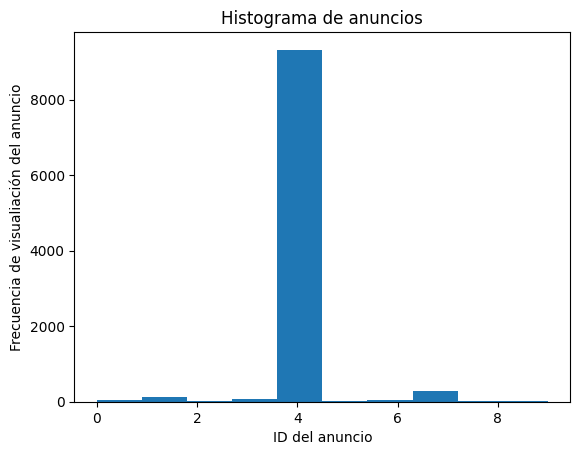

In [10]:
plt.hist(ads_selected)
plt.title("Histograma de anuncios")
plt.xlabel("ID del anuncio")
plt.ylabel("Frecuencia de visualiación del anuncio")
plt.show()

Podemos ver que en el muestro de Thompson converge más rápido. Esto se traduce que la empresa gaste menos en detectar cual es mejor el anuncio. 